## Aula 20 - Feature Engineering - Parte 2

In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from confusion_matrix import plot_confusion_matrix

In [3]:
data = pd.read_csv('Base Analytics.csv')

In [4]:
# Filtrando os dados numéricos
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data = data[data['Admissão'] >= '2011-01-01'].reset_index().drop(columns='index')
data_num = data.select_dtypes(include=numerics).copy()
data_num = data_num.drop(columns=['ADP', 'Cod.Cargo', 'Cod.Cargo Admissão', 'CC', 
                                              'Hora Extra 2016', 'Hora Negativa 2016', 'Ad. Noturno 2016', 
                                              'Absenteísmo 2016', 'Hora Extra 2017', 'Hora Negativa 2017', 
                                              'Ad. Noturno 2017', 'Absenteísmo 2017', 'Banda', 
                                              '2012/13 Goal Achievement'], axis=1)

In [5]:
# Preenchendo os nulos
for col in data_num.columns:
    qtt = data_num[col].isnull().sum()
    if qtt > 0:
        print(col, qtt)
        data_num.update(data_num[col].fillna(data_num[col].mean()))

2013/14 Goal Achievement 245
2014/15 Goal Achievement 229
2015/16 Goal Achievement 148
2016/17 Goal Achievement 143


In [573]:
# Aplicando o StandardScaler 
scaler = StandardScaler()
data_num_scaled = pd.DataFrame(scaler.fit_transform(data_num.drop(columns='PROMOVIDO')),
                               columns=list(data_num.drop(columns='PROMOVIDO').columns))

#### Quais outras features usar?
Quais são os tipos das features desse dataset?

Podemos/queremos usar todas elas? 

.

.

.

.

.

.

.

.

.

In [419]:
data.drop(columns=data_old.columns).columns

Index(['ADP', 'Admissão', 'Desligamento', 'Desligado?',
       'Iniciativa Desligamento', 'Cod.Cargo', 'Cargo', 'Cod.Cargo Admissão',
       'Cargo Admissão', 'CC', 'Area', 'Diretoria', 'Estado Civil', 'Educação',
       'Sexo', 'Banda', 'Nivel', 'Hora Extra 2016', 'Hora Negativa 2016',
       'Ad. Noturno 2016', 'Absenteísmo 2016', 'Hora Extra 2017',
       'Hora Negativa 2017', 'Ad. Noturno 2017', 'Absenteísmo 2017',
       '2012/13 Rating', '2012/13 Goal Achievement', '2013/14 Rating',
       '2014/15 Rating', '2015/16 Rating', '2016/17 Rating', 'AUMENTO 2012',
       'AUMENTO 2013', 'AUMENTO 2014', 'AUMENTO 2015', 'AUMENTO 2016',
       'AUMENTO 2017', 'DISSIDIO 2012', 'DISSIDIO 2013', 'DISSIDIO 2014',
       'DISSIDIO 2015', 'DISSIDIO 2016', 'DISSIDIO 2017', 'MERITO 2012',
       'MERITO 2013', 'MERITO 2014', 'MERITO 2015', 'MERITO 2016',
       'MERITO 2017', 'PROMOÇÃO 2012', 'PROMOÇÃO 2013', 'PROMOÇÃO 2014',
       'PROMOÇÃO 2015', 'PROMOÇÃO 2016', 'PROMOÇÃO 2017'],
      dtype=

In [420]:
data.isnull().sum()

ADP                            0
Admissão                       0
Desligamento                   0
Desligado?                     0
Iniciativa Desligamento      224
Tempo de Casa                  0
Cod.Cargo                      0
Cargo                          0
Cod.Cargo Admissão             0
Cargo Admissão                 0
CC                             0
Area                           0
Diretoria                      0
Estado Civil                   0
Educação                       0
Idade Atual/ Desligamento      0
Idade na Admissão              0
Sexo                           0
Banda                          0
Nivel                          0
Hora Extra 2016              191
Hora Negativa 2016           192
Ad. Noturno 2016             192
Absenteísmo 2016             118
Hora Extra 2017              196
Hora Negativa 2017           196
Ad. Noturno 2017             196
Absenteísmo 2017             116
2012/13 Rating               272
2012/13 Goal Achievement     356
          

### Categorical Data

#### One Hot Encoding

![](images/one_hot1.png)
![](images/one_hot2.png)

In [547]:
le = LabelEncoder()
sex_intlabels = le.fit_transform(data['Sexo'])
data['Sexo_'] = sex_intlabels

In [548]:
ohe = OneHotEncoder()
sex_cols = ohe.fit_transform(data[['Sexo_']]).toarray()
sex_cols_labels = ['Sexo_'+str(cls_label) for cls_label in set(sex_intlabels)]
sex_df = pd.DataFrame(sex_cols, columns=sex_cols_labels )

Confusion matrix, without normalization
[[78 12]
 [ 4 13]]
Normalized confusion matrix
[[ 0.86666667  0.13333333]
 [ 0.23529412  0.76470588]]


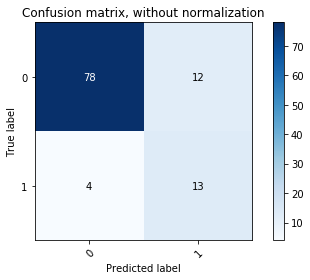

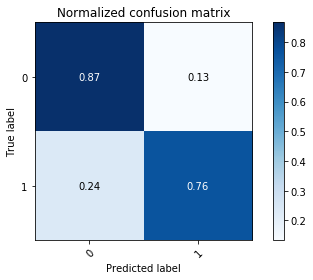

In [555]:
#X = data_num_scaled
X = pd.concat([data_num_scaled,sex_df], axis=1)
y = data_num['PROMOVIDO']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(random_state=42, class_weight='balanced')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
plot_confusion_matrix(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred, normalize='yes')

#### Dummies
Pandas Dataframe function [*get_dummies*](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.get_dummies.html)

In [576]:
sex_dummies = pd.get_dummies(data['Sexo'], drop_first=True)
sex_dummies.sample(5)

,M
196,1
80,1
344,0
254,1
300,0


In [579]:
X = pd.concat([data_num_scaled,sex_dummies], axis=1)
X.sample(5)

,Tempo de Casa,Idade Atual/ Desligamento,Idade na Admissão,2013/14 Goal Achievement,2014/15 Goal Achievement,2015/16 Goal Achievement,2016/17 Goal Achievement,M
185,0.193669,0.935176,0.943804,0.000000,-7.691750e-01,-2.611949e-02,9.135312e-01,0
323,-0.552061,0.002463,0.311910,0.000000,-2.356860e-15,2.244346e-15,-2.849128e-01,1
158,-1.162203,-0.990941,-0.757627,0.856874,-2.356860e-15,2.244346e-15,-2.468248e-15,1
255,0.397049,0.002463,0.003218,0.000000,-2.356860e-15,1.032024e+00,-2.369163e+00,1
36,2.091889,0.701998,0.067529,0.882911,2.590905e-01,3.213305e-01,-1.153351e+00,0


Confusion matrix, without normalization
[[78 12]
 [ 4 13]]
Normalized confusion matrix
[[ 0.86666667  0.13333333]
 [ 0.23529412  0.76470588]]


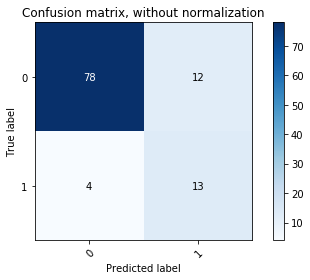

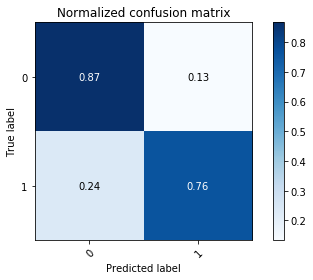

In [580]:
y = data_num['PROMOVIDO']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(random_state=42, class_weight='balanced')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
plot_confusion_matrix(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred, normalize='yes')

#### Effect Coding
- Bem similar ao *dummy*;
- Substitui por -1 todos os 0s que representam uma das categorias (primeira ou última) no dummy encoding;
- Exemplo do [link 2](https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63) do pré-aula:

![Example1](images/effect_coding.png)

- [Outro exemplo](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-effect-coding/)

#### Bin-counting 
- Maldição da dimensionalidade, categorias "grandes" (com muitos valores distintos);
- Usa probabilidade baseada em informação estatística da relação do valor com o target;
- Exemplo simplificado do [link 2](https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63): construir valores de probabilidade de um ataque DDoS ser causado por qualquer um dos endereços IP baseado em **dados históricos** de endereços IP relacionados a ataques DDoS.

#### Feature Hashing Scheme
- Maldição da dimensionalidade;
- **Função Hash** tipicamente usada com um número pré-definido de features resultantes (vetor de comprimento pré-definido) de forma que os valores de hash dos valores da categoria sejam usados como índices nesse vetor predefinido e os valores sejam atualizados de acordo.
- Funções Hash mapeiam uma grande quantidade de valores em uma quantidade finita (e pequena) de valores -> colisões.
- [Explicação básica sobre funções hash](https://www.techtudo.com.br/artigos/noticia/2012/07/o-que-e-hash.html)
- [Função Scikit Learn](https://scikit-learn.org/0.19/modules/generated/sklearn.feature_extraction.FeatureHasher.html)